In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import ruptures as rpt

Import some jobs

In [13]:
import os
csv_file = os.path.join("C:\\Users\\a770398\IO-SEA\io-sea-3.4-analytics\\dataset_generation\\dataset_generation\\dataset_oth_db\\job_1272.csv")


Basic plot

array([[<AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>]], dtype=object)

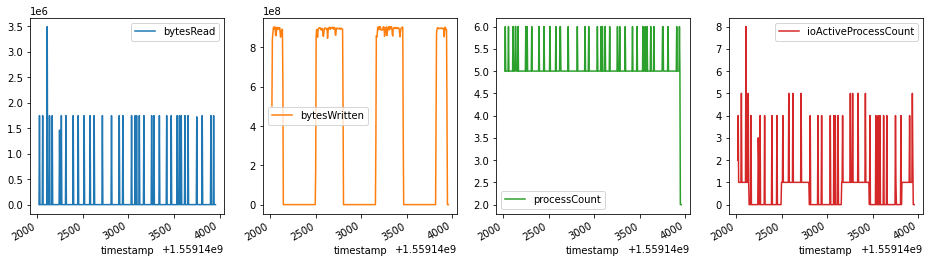

In [47]:
df = pd.read_csv(csv_file, index_col=0)
df.plot(x="timestamp", figsize=(16,4), sharex=True, subplots=True, layout=(1, 4))
#df.head()

Now we apply some algos on the bidimensional signal (y1=["bytesRead"], y2=["bytesWritten"]

<AxesSubplot:>

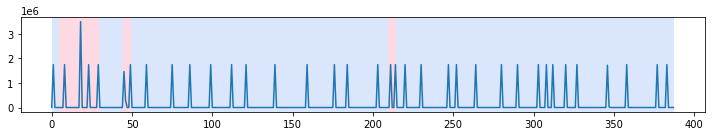

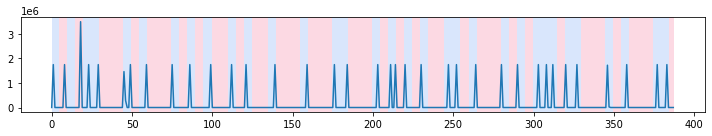

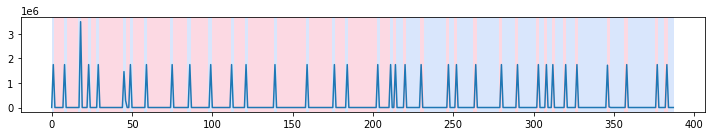

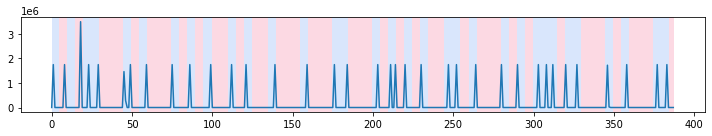

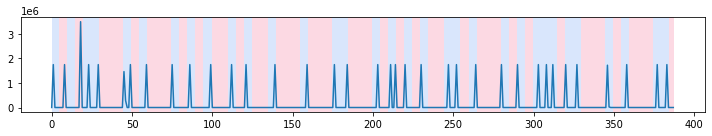

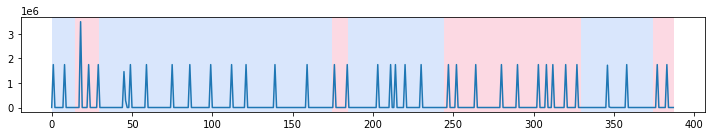

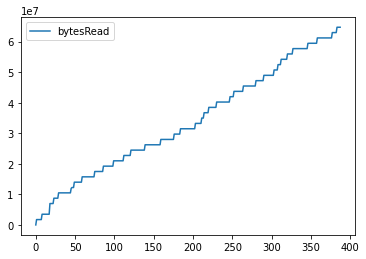

In [92]:
signal = df[["bytesRead"]].to_numpy()

dyn_result = rpt.Dynp(model="rbf").fit(signal).predict(n_bkps=6)
pelt_result = rpt.Pelt(model="rbf", min_size=3).fit(signal).predict(pen=0.1)
kcpd_result = rpt.KernelCPD(kernel="rbf").fit(signal).predict(pen=0.1)
binseg_result = rpt.Binseg(model="l2").fit(signal).predict(pen=0.1)
botup_result = rpt.BottomUp(model="l2").fit(signal).predict(pen=0.1)
wind_result = rpt.Window(model="l2", width=10).fit(signal).predict(pen=0.1)

rpt.display(signal, dyn_result)
rpt.display(signal, pelt_result)
rpt.display(signal, kcpd_result)
rpt.display(signal, binseg_result)
rpt.display(signal, botup_result)
rpt.display(signal, wind_result)

df[["bytesRead"]].cumsum().plot()